In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('./train.csv')

In [4]:
df.shape

(42000, 785)

In [5]:
l=df['label']
l.shape

(42000,)

In [6]:
x=df.drop('label',axis=1)

2

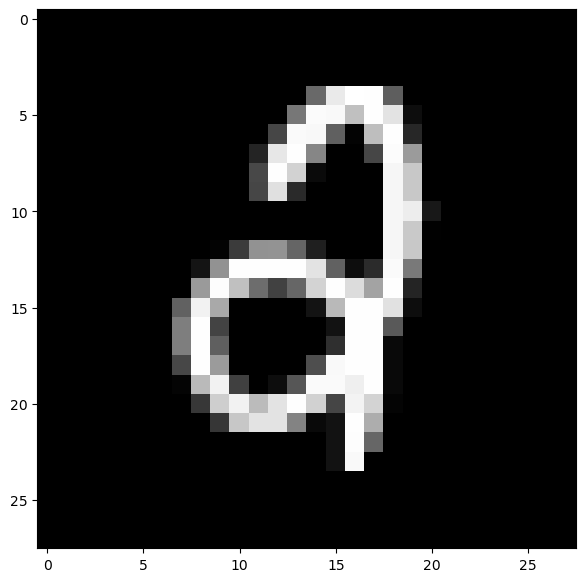

In [7]:
plt.figure(figsize=(7,7))
idx=10000
visual_m=x.iloc[idx].values.reshape(28,28)
plt.imshow(visual_m,interpolation='none',cmap='gray')
l[idx]

In [55]:
lf=l.head(15000)
xf=x.head(15000)
print(xf.shape)

(15000, 784)


In [56]:
from sklearn.preprocessing import StandardScaler
xs=StandardScaler().fit_transform(xf)
xs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
cov_matrix=np.matmul(xs.T,xs)

In [11]:
cov_matrix.shape

(784, 784)

In [17]:
from scipy.linalg import eigh
values,vectors=eigh(cov_matrix,eigvals=(782,783))
# print(vectors.shape)
v=vectors.T
v.shape

(2, 784)

In [19]:
fv=np.matmul(v,xs.T)

In [20]:
fv.shape

(2, 15000)

In [21]:
import pandas as pd

In [25]:
fv=np.vstack((fv,lf)).T

In [27]:
fv.shape

(15000, 3)

In [28]:
df=pd.DataFrame(data=fv,columns=('1st','2nd','label'))
df.head()

,1st,2nd,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


In [29]:
import seaborn as sns


seaborn.axisgrid.FacetGrid

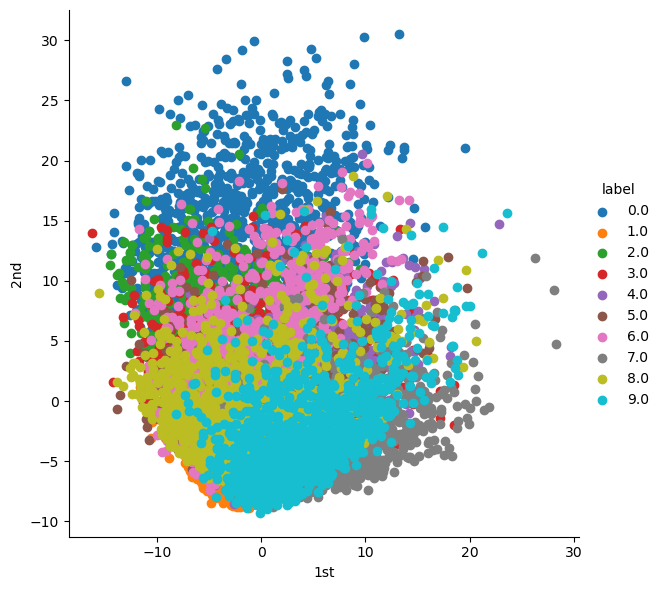

In [30]:
sns.FacetGrid(df,hue='label',height=6).map(plt.scatter,'1st','2nd').add_legend()

In [31]:
from sklearn import decomposition 
pca=decomposition.PCA()

In [32]:
pca.n_components=2
pca_data=pca.fit_transform(xs)

In [33]:
pca_data.shape

(15000, 2)

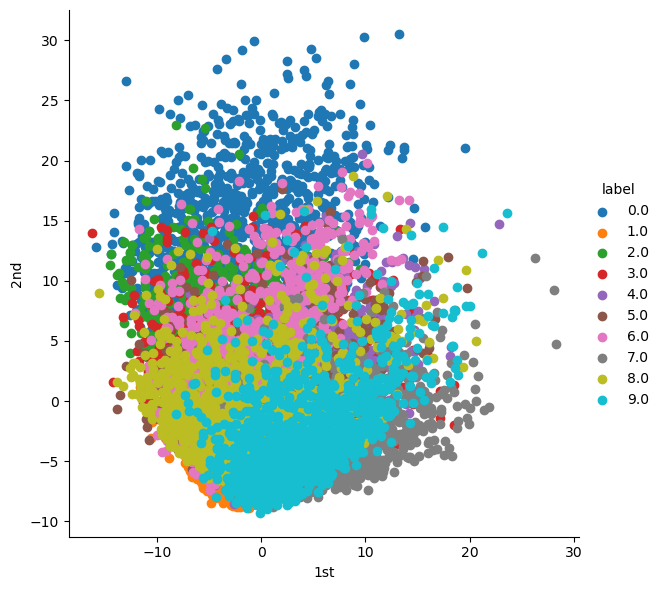

In [40]:
df=pd.DataFrame(data=fv,columns=('1st','2nd','label'))
sns.FacetGrid(df,hue='label',height=6).map(plt.scatter,'1st','2nd').add_legend()
# sns.FacetGrid(df,hue='label',height=6).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

In [53]:
pca.n_components=784
pca_data=pca.fit_transform(xs)
pve=pca.explained_variance_/np.sum(pca.explained_variance_)
cve=np.cumsum(pve)

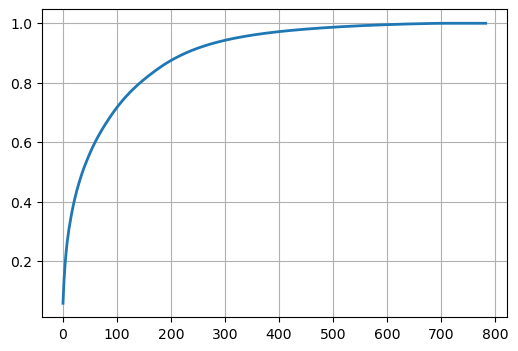

In [63]:
plt.figure(1,figsize=(6,4))
plt.clf
plt.plot(cve,linewidth=2)
plt.grid()
plt.axis('tight')
plt.show()

In [71]:
from sklearn.manifold import TSNE

data=xs[0:10000,:]
labels=l[0:10000]

In [72]:
model=TSNE(n_components=2,random_state=0)
to=model.fit_transform(data)

/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


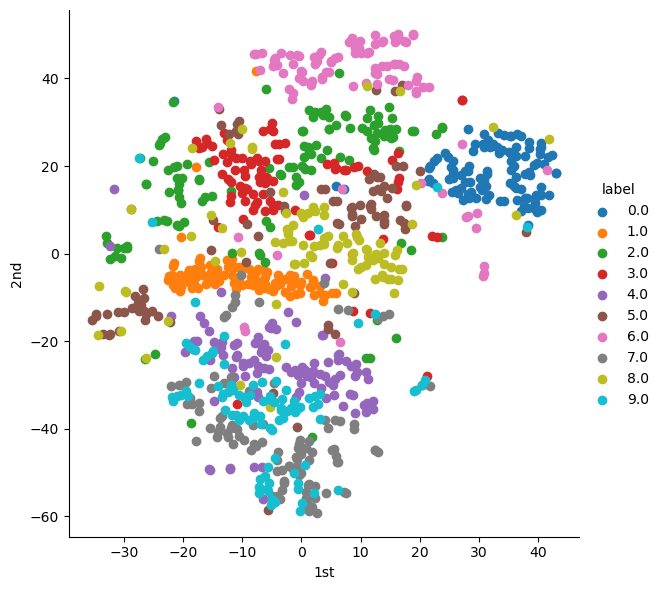

In [69]:
to=np.vstack((to.T,labels)).T
df=pd.DataFrame(data=to,columns=('1st','2nd','label'))
sns.FacetGrid(df,hue='label',height=6).map(plt.scatter,'1st','2nd').add_legend()
# sns.FacetGrid(df,hue='label',height=6).map(plt.scatter,'1st','2nd').add_legend()
plt.show()